In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install wordcloud

# 1. Importing libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import unicodedata
from nltk import WordNetLemmatizer
nltk.download('wordnet')
from nltk import PorterStemmer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# 2. Loading data

In [0]:
df = pd.read_csv('/content/drive/My Drive/preprocessed_dataset_tokenization_stopwords_removal_lemmatization_title.csv',index_col=0,dtype=object)
print (df.shape)
df.head()

(420545, 2)


,Title,Body
0,"['check', 'upload', 'image', 'without', 'mime'...",I'd like to check if an uploaded file is an im...
1,"['prevent', 'firefox', 'close', 'press', 'ctrl...","In my favorite editor (vim), I regularly use c..."
2,"['r', 'error', 'invalid', 'type', 'list', 'var...",I am import matlab file and construct a data f...
3,"['replace', 'special', 'character', 'url']","This is probably very simple, but I simply can..."
4,"['modify', 'whois', 'contact', 'detail']",function modify(.......){ $mcontact = file_ge...


For some reason, the loaded dataset has the list of tokens inside a string. Therefore, the lists of tokens are not accessible directly. To overcome this we will perform the following function. 

In [0]:
def fix_list_string(token_list):
  transformed_list = list(pd.Series(token_list.strip('[]').split(', ')).apply(lambda x: x[1:-1]))
  return transformed_list

In [0]:
df['Title'] = df['Title'].apply(fix_list_string)
df['Title'][0]

['check', 'upload', 'image', 'without', 'mime', 'type']

Looks like it worked!

# 2. Exploratory Data Analysis

## a. Getting word frequencies

In [0]:
def combine_list_of_words(word_list):
    combined_list = []
    for i in word_list:
        combined_list.extend(i)
    return combined_list

Above, we defined a function that takes a list of list of tokens and combines all the tokens into a single list. 

In [0]:
title_words = combine_list_of_words(df['Title'])
title_words[:10]

['check',
 'upload',
 'image',
 'without',
 'mime',
 'type',
 'prevent',
 'firefox',
 'close',
 'press']

In [0]:
df_title_words = pd.DataFrame()
df_title_words['word'] = nltk.FreqDist(title_words).keys()
df_title_words['freq'] = nltk.FreqDist(title_words).values()

df_title_words = df_title_words.sort_values("freq",ascending=False)
df_title_words.head(20)

,word,freq
156,work,12197
182,jquery,12025
435,android,12002
42,server,11918
68,php,11814
12,error,11655
186,data,11482
383,value,11284
105,c,11283
65,windows,10800


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

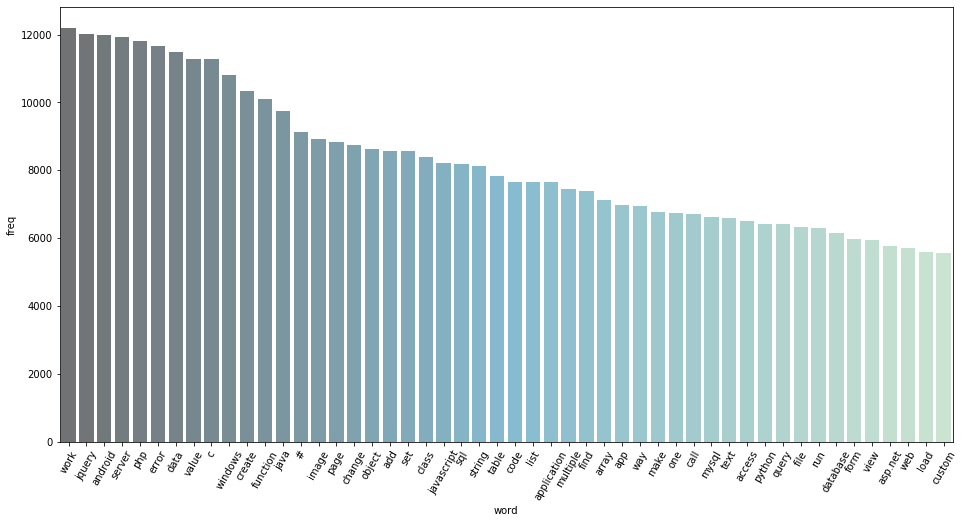

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(y='freq',x='word',data=df_title_words.head(50),alpha=0.7,palette="GnBu_d")
plt.xticks(rotation=60)

From the distribution above, we can see that words such as *work, jquery, android and server* are some of the highest occurring words in the title column.

## b. Word frequencies using *WordCloud*

To visualize the highest occurring words in a more impactful manner, we construct a word cloud which really emphasizes more frequently occurring words. 

In [0]:
#Converting the list of tokenized words to a list containing all tokenized words in the dataset for use in the word cloud
all_title = []

for i in range(len(df['Title'])):
    all_title.extend(df['Title'].iloc[i])

print (all_title[:100])

['check', 'upload', 'image', 'without', 'mime', 'type', 'prevent', 'firefox', 'close', 'press', 'ctrl-w', 'r', 'error', 'invalid', 'type', 'list', 'variable', 'replace', 'special', 'character', 'url', 'modify', 'whois', 'contact', 'detail', 'set', 'proxy', 'active', 'directory', 'environment', 'draw', 'barplot', 'way', 'coreplot', 'fetch', 'xml', 'fee', 'asp.net', '.net', 'library', 'generate', 'javascript', 'sql', 'server', 'procedure', 'call', 'inline', 'concatenation', 'impossible', 'commercial', 'obfuscators', 'achieve', 'crash', '.net', 'reflector', 'ildasm', 'crappy', 'random', 'number', 'generator', 'migrate', 'mdaemon', 'postfix', 'find', 'latex3', 'manual', 'stop', 'windows', 'fade', 'windows', 'alt-tab', 'php', 'framework', 'url', 'conventions', 'create', '.rds', 'temporary', 'file', 'r', 'wpf', 'multiple', 'control', 'bind', 'property', 'play', 'framework', 'auto', 'javascript', 'css', 'minifier', 'create', 'repetitive', 'node', 'hash', 'array', 'simplexml_load_string', 'cyc

In [0]:
#Converting the tokenized words into a single string for use in the word cloud function
all_title = ' '.join(all_title)

print (all_title[:100])

check upload image without mime type prevent firefox close press ctrl-w r error invalid type list va


Below, we implement the word cloud for the *Title* column.

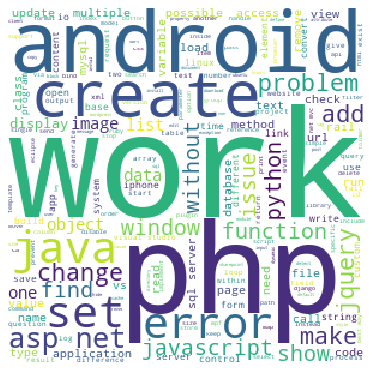

In [0]:
#Implementing the word cloud for the title
wordcloud = WordCloud(background_color="white", 
                      max_words=200, 
                      width=300, 
                      height=300, 
                      #mask=char_mask, 
                      ).generate(all_title) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

As seen from the histograms above, the word cloud also points out the more frequent words in larger font such as *php, type and create*. 

The body word cloud in comparison has more nouns and verbs as the frequently occurring words. 

## c. Part of speech tagging to remove unwanted tags

Removing verbs will be important for topic modeling as we are only interested in things like nouns, especially proper nouns. Verbs consist of actions which cannot be used as keywords. 

However, we will still keep a version of the dataset containing the verbs for comparison. 

#### Common POS tags:
- Nouns: NN
- Plural nouns: NNS
- Proper nouns: NNP, NNPS
- Verbs: VBP, VBN and VBD
- Adjectives: JJ, JJR, JJS
- Adverbs: RB, RBR (comparative), RBS (superlative)
- Cardinal numbers: CD

First let's explore all types of POS tags that exist in the dataset for both title and body.

In [0]:
pos_tags_title = []

for i in range(df.shape[0]):
  try:
    pos_tags_title.extend(nltk.pos_tag(df['Title'][i]))
  except:
    continue
    
pos_tags_title[:5]

[('check', 'NN'),
 ('upload', 'JJ'),
 ('image', 'NN'),
 ('without', 'IN'),
 ('mime', 'NN')]

Above, we have concatenated pos tags from each row of the dataset together to create a long list of tokens and tags in tuples. Next, we will separate the tokens and tags into separate lists to analyze them further. 

In [0]:
title_tokens = list(list(zip(*pos_tags_title))[0])
title_tags = list(list(zip(*pos_tags_title))[1])

title_tags[:10]

['NN', 'JJ', 'NN', 'IN', 'NN', 'NN', 'NN', 'NN', 'JJ', 'NN']

Now we can visualize the frequencies of tags easily. 

Text(0.5, 0, 'Tags')

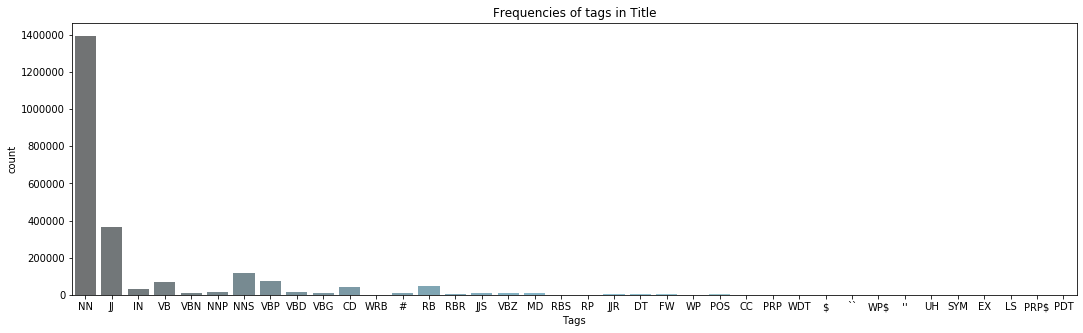

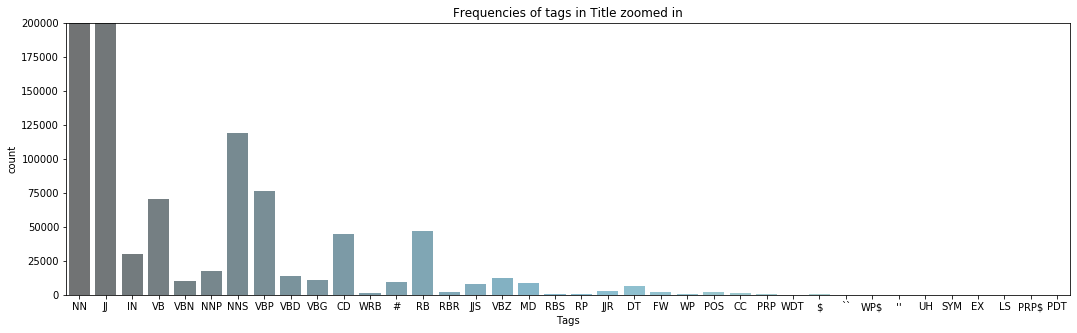

In [0]:
#Plotting tag frequencies for title
plt.figure(figsize=(18,5))
sns.countplot(title_tags,palette='GnBu_d',alpha=0.7)
plt.title("Frequencies of tags in Title")
plt.xlabel('Tags')

plt.figure(figsize=(18,5))
sns.countplot(title_tags,palette='GnBu_d',alpha=0.7)
plt.ylim(0,200000)
plt.title("Frequencies of tags in Title zoomed in")
plt.xlabel('Tags')

In [0]:
#Finding highest occurring tags
print (pd.Series(title_tags).value_counts().head(20))

NN     1394514
JJ      367719
NNS     118973
VBP      76103
VB       70280
RB       47175
CD       44420
IN       29867
NNP      17146
VBD      14201
VBZ      12238
VBG      10940
VBN      10064
#         9138
MD        8422
JJS       7729
DT        6421
JJR       2927
RBR       2059
FW        2003
dtype: int64


From the distributions above, we can see that nouns are by far the most frequent (1,394,514) with adjectives coming in at second (367719). The second plot above shows a scaled version of the first graph to show the frequencies of some of the less frequent tags more clearly. Verbs (VB, VBN, VBP, VBD etc) come up to around 19,000 to 20,000 in total while adverbs (RB, RBS, RBR) account for less than 50,000 of the instances. 

Next, lets take a look at some examples of verbs since we want to remove them from the dataset. 

#### Exploring verbs

In [0]:
df_title_tags = pd.DataFrame()
df_title_tags['token'] = title_tokens
df_title_tags['tag'] = title_tags
df_title_tags.head()

,token,tag
0,check,NN
1,upload,JJ
2,image,NN
3,without,IN
4,mime,NN


Below, we extract all the verbs in the title and explore each one.

In [0]:
verbs = df_title_tags[df_title_tags['tag'].str.contains(r'V')]
verbs.head(10)

,token,tag
17,replace,VB
21,modify,VB
25,set,VBN
51,achieve,VBP
62,postfix,VBP
63,find,VB
68,fade,VBD
96,simplexml_load_string,VBG
130,make,VB
148,resolve,VBP


In [0]:
#Extracting frequency of words with VB tags
verbs[verbs['tag']=='VB']['token'].value_counts().head(10)

add        5113
find       4384
make       4181
run        3725
remove     3313
get        3299
replace    1757
keep       1371
save       1102
try        1008
Name: token, dtype: int64

In [0]:
#Extracting frequency of words with VBD tags
verbs[verbs['tag']=='VBD']['token'].value_counts().head(10)

read           665
embed          605
put            563
undefined      449
silverlight    420
height         346
set            278
sql            190
hit            157
highlight      133
Name: token, dtype: int64

In [0]:
#Extracting frequency of words with VBN tags
verbs[verbs['tag']=='VBN']['token'].value_counts().head(10)

set       6738
run        422
embed      283
read       175
put        140
come       132
sed         81
token       71
offset      64
become      61
Name: token, dtype: int64

In [0]:
#Extracting frequency of words with VBP tags
verbs[verbs['tag']=='VBP']['token'].value_counts().head(10)

make       2069
find       2009
object     1599
exist      1428
include    1365
fail       1067
save       1039
need        914
add         896
leave       860
Name: token, dtype: int64

From the above analysis, we can see that most of the highest occurring verbs in the title column don't provide crucial words or keywords. These are mostly actions and don't provide information such as topics. 

They could be used for a different type of analysis but perhaps not for topic modeling. 

Text(0, 0.5, 'Verb')

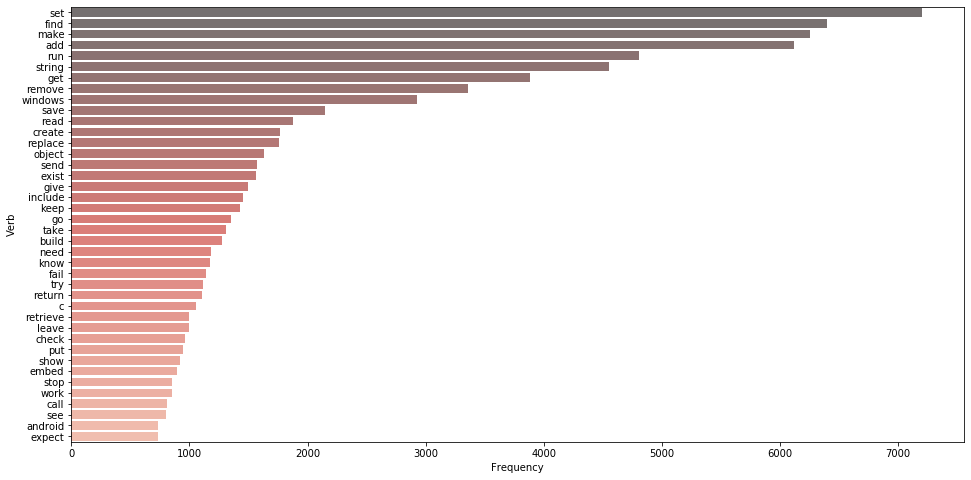

In [0]:
#Visualizing highest occurring verbs
plt.figure(figsize=(16,8))
sns.barplot(x=verbs['token'].value_counts().values[:40],y=verbs['token'].value_counts().index[:40],palette='Reds_d',alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Verb')

From the highest occurring verbs, most of the words don't add much value for topic modeling. However, there are certain words that should really be in the **noun** category such as **windows and android**. On the other hand, certain words could fall under both verb and noun depending on the meaning and context. Such words are **object and string**. The POS tagger is not going to be able to handle these intricacies. Although, I would hope that some of these words also show up as nouns so we don't have to delete them. 

#### Exploring adjectives

In [0]:
adj = df_title_tags[df_title_tags['tag'].str.contains(r'J')]
adj.head(10)

,token,tag
1,upload,JJ
8,close,JJ
13,invalid,JJ
16,variable,JJ
18,special,JJ
22,whois,JJ
26,proxy,JJ
27,active,JJ
38,.net,JJ
39,library,JJ


In [0]:
#Extracting frequency of words with VBP tags
adj[adj['tag']=='JJ']['token'].value_counts().head(20)

android      5916
multiple     5556
different    4652
new          4094
possible     4053
open         3747
table        3625
update       3578
c            3499
variable     3395
object       3028
specific     2788
visual       2616
select       2596
url          2563
dynamic      2136
single       2098
write        2090
key          1953
disable      1895
Name: token, dtype: int64

In [0]:
#Extracting frequency of words with VBP tags
adj[adj['tag']=='JJS']['token'].value_counts().head(20)

best              3278
nest              1304
latest             303
fastest            288
easiest            236
least              199
manifest           126
simplest           124
guest              121
request            107
highest             97
largest             90
closest             76
nearest             74
xmlhttprequest      74
smallest            68
longest             62
shortest            60
lowest              54
httpwebrequest      51
Name: token, dtype: int64

Text(0, 0.5, 'Adjective')

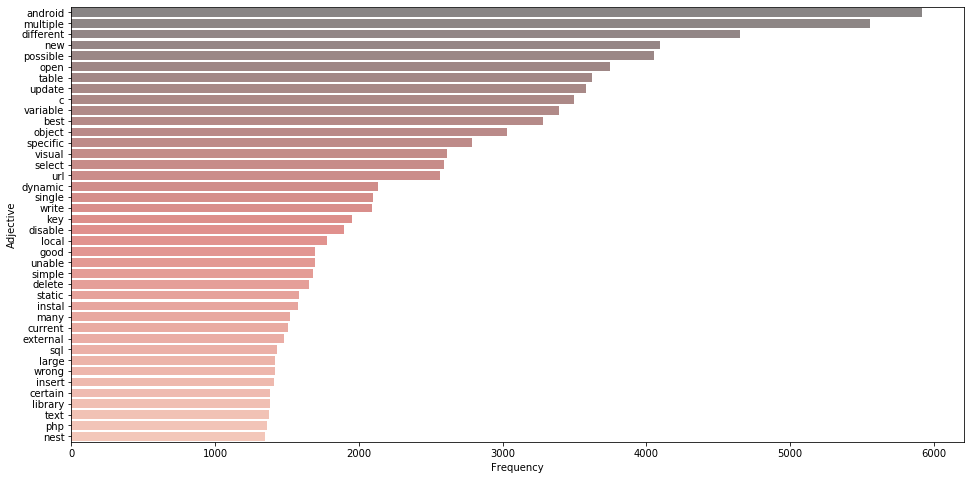

In [0]:
#Visualizing highest occurring adjectives
plt.figure(figsize=(16,8))
sns.barplot(x=adj['token'].value_counts().values[:40],y=adj['token'].value_counts().index[:40],palette='Reds_d',alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Adjective')

When it comes to adjectives, the highest occurring words are accurate to a good extent but there are some keywords such as **android, library, c, url and php** that need to be preserved as they could serve as potential keywords. Overall, the adjectives seem to be more useful for topic modeling than verbs. Hence, we may end up retaining this category. 

#### Exploring adverbs

In [0]:
adv = df_title_tags[df_title_tags['tag'].str.contains(r'^R+')]
adv.head(10)

,token,tag
129,understand,RB
132,instead,RB
183,longer,RBR
360,menu,RB
362,mvc,RB
370,best,RBS
477,newly,RB
505,repeatedly,RB
530,reliably,RB
535,frequently,RB


Text(0, 0.5, 'Adverb')

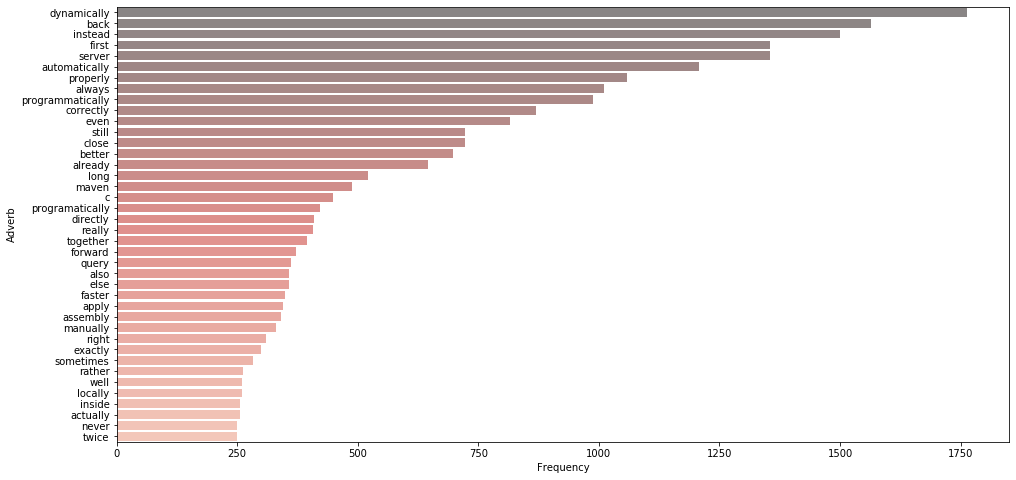

In [0]:
#Visualizing highest occurring adjectives
plt.figure(figsize=(16,8))
sns.barplot(x=adv['token'].value_counts().values[:40],y=adv['token'].value_counts().index[:40],palette='Reds_d',alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Adverb')

Since adverbs describe an action (or verb), a lot of these words would be similar to verbs themselves. Hence, similar to verbs, adverbs don't really provide a lot of keywords for our analysis. We can possibly get rid of these. 

#### Exploring nouns

In [0]:
noun = df_title_tags[df_title_tags['tag'].str.contains(r'^N+')]
noun.head(10)

,token,tag
0,check,NN
2,image,NN
4,mime,NN
5,type,NN
6,prevent,NN
7,firefox,NN
9,press,NN
10,ctrl-w,NN
11,r,NN
12,error,NN


In [0]:
#Extracting frequency of words with NN tags
print (noun[noun['tag']=='NN']['token'].value_counts().head(20))

jquery         11859
work           11339
value          11281
error          11175
function        9916
server          9738
php             9666
java            8924
image           8911
page            8658
class           8384
change          8208
javascript      7909
create          7726
application     7585
code            7401
list            7205
way             6941
access          6515
array           6468
Name: token, dtype: int64


In [0]:
#Extracting frequency of words with NNS tags
print (noun[noun['tag']=='NNS']['token'].value_counts().head(20))

data            11206
windows          7847
ios              2924
elements         2098
variables        1952
problems         1662
users            1523
items            1506
methods          1456
parameters       1402
errors           1260
properties       1256
events           1164
c                1149
applications      909
options           838
settings          825
arguments         728
permissions       693
resources         647
Name: token, dtype: int64


In [0]:
#Extracting frequency of words with NNS tags
noun[noun['tag']=='NNP']['token'].value_counts().head(20)

xml         1681
x           1609
.net         977
\\mathbb     508
\\frac       420
\\           266
^            250
xcode        209
xp           149
z            137
|            131
\\infty      125
’            113
\\sqrt       110
-1           109
“            106
xaml         103
\\in         102
\\sin         98
”             95
Name: token, dtype: int64

Note that a lot of the proper nouns are strange strings such as **x322, .pfd, \infty**. It may be useful to get rid of this particular category. Although, from the table above, tokens such as **xml** are important so we would need to find a way to preserve those. 

In [0]:
#Extracting frequency of words with NNPS tags
noun[noun['tag']=='NNPS']['token'].value_counts().head(20)

Series([], Name: token, dtype: int64)

Text(0, 0.5, 'Noun')

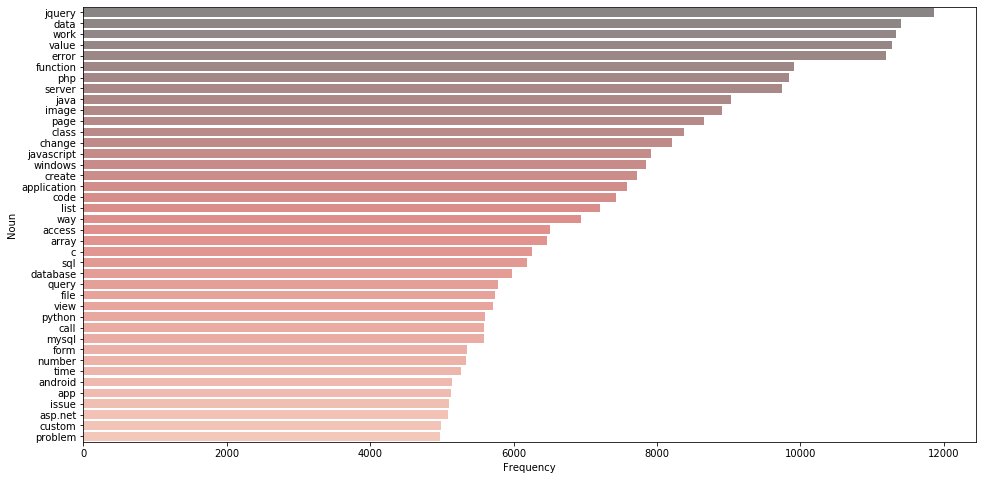

In [0]:
#Visualizing highest occurring nouns
plt.figure(figsize=(16,8))
sns.barplot(x=noun['token'].value_counts().values[:40],y=noun['token'].value_counts().index[:40],palette='Reds_d',alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Noun')

### Excluding all POS tags other than nouns from the dataset

In [0]:
#Only selecting nouns
df_title_noun = df_title_tags[(df_title_tags['tag']=='NN') | (df_title_tags['tag']=='NNS') | (df_title_tags['tag']=='NNP') | (df_title_tags['tag']=='NNPS')]
df_title_noun.head(10)

,token,tag
0,check,NN
2,image,NN
4,mime,NN
5,type,NN
6,prevent,NN
7,firefox,NN
9,press,NN
10,ctrl-w,NN
11,r,NN
12,error,NN


## d. Getting word frequencies following POS tagging

In [0]:
df_title_words = pd.DataFrame()
df_title_words['word'] = nltk.FreqDist(df_title_noun['token']).keys()
df_title_words['freq'] = nltk.FreqDist(df_title_noun['token']).values()

df_title_words = df_title_words.sort_values("freq",ascending=False)
df_title_words.head(10)

,word,freq
130,jquery,11859
131,data,11409
110,work,11339
255,value,11281
9,error,11193
265,function,9916
45,php,9837
28,server,9743
111,java,9028
1,image,8911


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

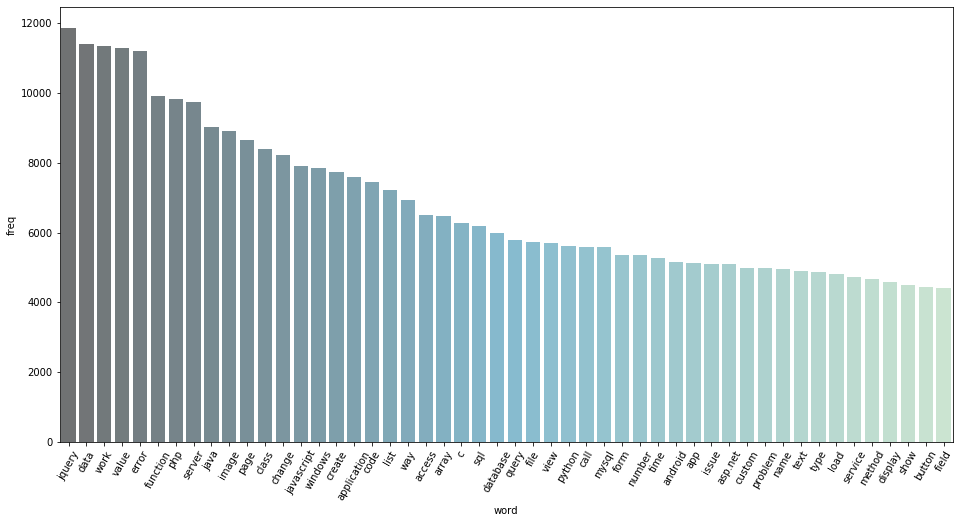

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(y='freq',x='word',data=df_title_words.head(50),alpha=0.7,palette="GnBu_d")
plt.xticks(rotation=60)

From the distribution above, we can see that words such as *create, jquery, server and java* are some of the highest occurring words in the title column and they match our earlier visualization contains just nouns. 

## e. Word frequencies using *WordCloud* following POS tagging

In [0]:
#Converting the tokenized words into a single string for use in the word cloud function
all_title = ' '.join(df_title_noun['token'])

print (all_title[:100])

check image mime type prevent firefox press ctrl-w r error type list character url contact detail di


Below, we implement the word cloud for the *Title* column.

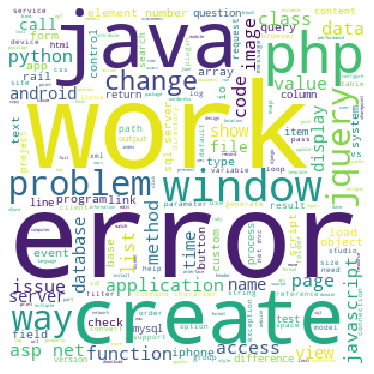

In [0]:
#Implementing the word cloud for the title
wordcloud = WordCloud(background_color="white", 
                      max_words=200, 
                      width=300, 
                      height=300, 
                      #mask=char_mask, 
                      ).generate(all_title) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## f. Getting only *nouns* in document format

Previously, when we explored the POS tags, we did it by extracting each and every words and putting them in a single list. To analyze the word frequencies, we simply used this list. However, in order to conduct topic modeling using techniques such as Latent Dirichlet Allocation (LDA), the dataset needs to be in a **document-term matrix** format. Therefore, we need to keep the nouns but still have the tokens in a document form. 

In [0]:
df['Title'].head(10)

0          [check, upload, image, without, mime, type]
1             [prevent, firefox, close, press, ctrl-w]
2            [r, error, invalid, type, list, variable]
3                   [replace, special, character, url]
4                     [modify, whois, contact, detail]
5         [set, proxy, active, directory, environment]
6                       [draw, barplot, way, coreplot]
7                           [fetch, xml, fee, asp.net]
8                [.net, library, generate, javascript]
9    [sql, server, procedure, call, inline, concate...
Name: Title, dtype: object

In [0]:
#Function to read in lists of tokens and return the list with only nouns 
def keep_nouns_in_doc(doc_list):
    try:
      tags = nltk.pos_tag(doc_list)
      tags = list(zip(*tags))
      doc_list_nouns = []
      for i in range(len(tags[0])):
        try:
          if tags[1][i].startswith('NN'):
            doc_list_nouns.append(tags[0][i])
        except:
          continue
      return doc_list_nouns
    except:
      return ['']

In [0]:
#Applying the above function to the dataset
df_text_nouns = pd.DataFrame()
df_text_nouns['Title'] = df['Title'].apply(keep_nouns_in_doc)
df_text_nouns

,Title
0,"[check, image, mime, type]"
1,"[prevent, firefox, press, ctrl-w]"
2,"[r, error, type, list]"
3,"[character, url]"
4,"[contact, detail]"
...,...
420662,"[windows, program, memory]"
420663,"[jquery, script, javascript, script, wordpress]"
420664,"[ip, address, network, address, network, prefi..."
420665,"[jquery, project, studio, practice]"


To verify that our transformation worked, we can look at the word frequencies once again briefly.

In [0]:
title_words = combine_list_of_words(df_text_nouns['Title'])

df_title_words = pd.DataFrame()
df_title_words['word'] = nltk.FreqDist(title_words).keys()
df_title_words['freq'] = nltk.FreqDist(title_words).values()

df_title_words = df_title_words.sort_values("freq",ascending=False)
df_title_words.head(10)

,word,freq
130,jquery,11865
131,data,11412
110,work,11344
255,value,11284
9,error,11197
265,function,9921
45,php,9837
28,server,9747
111,java,9031
1,image,8913


Looking at the table above for the highest occurring words in the **Title** column, the top entries match the list we observed earlier. So I think we should be good to proceed. 

In [0]:
df_text_nouns.head()

,Title
0,"[check, image, mime, type]"
1,"[prevent, firefox, press, ctrl-w]"
2,"[r, error, type, list]"
3,"[character, url]"
4,"[contact, detail]"


In [0]:
def join_words(list_of_words):
    return ' '.join(list_of_words)

In [0]:
df_text_nouns['Title'] = df_text_nouns['Title'].apply(join_words)

df_text_nouns.head()

,Title
0,check image mime type
1,prevent firefox press ctrl-w
2,r error type list
3,character url
4,contact detail


In [0]:
df_text_nouns.shape

(420545, 1)

In [0]:
df_text_nouns.to_csv('/content/drive/My Drive/cleaned_preprocessed_dataset_with_only_nouns_and_title.csv')